## Задача


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [81]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sqlalchemy
import psycopg2 as ps

In [84]:
# Подключимся к БД и создадим курсор


pg_conn = {
    'host' : 'dsstudents.skillbox.ru',
    'port' : 5433,
    'dbname' : 'human_resources',
    'user' : 'readonly',
    'password' : '6hajV34RTQfmxhS'
}

conn = ps.connect(**pg_conn)

# Создадим курсор

cur = conn.cursor()

In [85]:
# Посмотрим на таблицы представленные в базе данных для анализа

pd.read_sql_query('''SELECT * FROM hr_dataset''', conn).head()

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/1270330333.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''SELECT * FROM hr_dataset''', conn).head()


,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [86]:
pd.read_sql_query('''SELECT * FROM hr_dataset''', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   310 non-null    int64  
 1   Employee Name        310 non-null    object 
 2   Employee Number      310 non-null    int64  
 3   marriedid            310 non-null    int64  
 4   maritalstatusid      310 non-null    int64  
 5   genderid             310 non-null    int64  
 6   empstatus_id         310 non-null    int64  
 7   deptid               310 non-null    int64  
 8   perf_scoreid         310 non-null    int64  
 9   age                  310 non-null    int64  
 10  Pay Rate             310 non-null    float64
 11  state                310 non-null    object 
 12  zip                  310 non-null    int64  
 13  dob                  310 non-null    object 
 14  sex                  310 non-null    object 
 15  maritaldesc          310 non-null    obj

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/2514095468.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''SELECT * FROM hr_dataset''', conn).info()


In [87]:
pd.read_sql_query('''SELECT * FROM production_staff''', conn).head()

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/1852835477.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''SELECT * FROM production_staff''', conn).head()


,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0.0,0.0,0.0,0.0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0.0,0.0,0.0,0.0


In [88]:
pd.read_sql_query('''SELECT * FROM production_staff''', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   256 non-null    int64  
 1   Employee Name        209 non-null    object 
 2   Race Desc            209 non-null    object 
 3   Date of Hire         209 non-null    object 
 4   TermDate             83 non-null     object 
 5   Reason for Term      209 non-null    object 
 6   Employment Status    209 non-null    object 
 7   Department           209 non-null    object 
 8   Position             209 non-null    object 
 9   Pay                  209 non-null    object 
 10  Manager Name         209 non-null    object 
 11  Performance Score    209 non-null    object 
 12  Abutments/Hour Wk 1  208 non-null    float64
 13  Abutments/Hour Wk 2  208 non-null    float64
 14  Daily Error Rate     208 non-null    float64
 15  90-day Complaints    208 non-null    flo

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/2297107610.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''SELECT * FROM production_staff''', conn).info()


In [89]:
pd.read_sql_query('''SELECT * FROM recruiting_costs''', conn).head()

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/1779017430.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''SELECT * FROM recruiting_costs''', conn).head()


,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
pd.read_sql_query('''SELECT * FROM recruiting_costs''', conn).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 22 non-null     int64 
 1   Employment Source  22 non-null     object
 2   January            22 non-null     int64 
 3   February           22 non-null     int64 
 4   March              22 non-null     int64 
 5   April              22 non-null     int64 
 6   May                22 non-null     int64 
 7   June               22 non-null     int64 
 8   July               22 non-null     int64 
 9   August             22 non-null     int64 
 10  September          22 non-null     int64 
 11  October            22 non-null     int64 
 12  November           22 non-null     int64 
 13  December           22 non-null     int64 
 14  Total              22 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.7+ KB


/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/2429145659.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''SELECT * FROM recruiting_costs''', conn).info()


In [91]:
pd.read_sql_query('''SELECT * FROM salary_grid''', conn)

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/4070404097.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''SELECT * FROM salary_grid''', conn)


,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45
5,6,Network Engineer,50845,66850,88279,24.44,32.14,42.44
6,7,Sr. Network Engineer,79428,99458,120451,38.19,47.82,57.91
7,8,Database Administrator,50569,68306,93312,24.31,32.84,44.86
8,9,Sr. DBA,92863,116007,139170,44.65,55.77,66.91
9,10,Production Technician I,30000,40000,50000,14.42,19.23,24.04


Для анализа нам предоставили базу данных, содержащую 4 таблицы. 

Таблица `hr_dataset` содержит 310 записей со следующей информацией о сотрудниках:

&nbsp;&nbsp;&nbsp;&nbsp;`id` - Порядковый номер записи о сотруднике <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Employee Name` - Имя сотрудника <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Employee Number` - ID сотрудника <br>
&nbsp;&nbsp;&nbsp;&nbsp;`marriedid` - ID семейного статуса <br>
&nbsp;&nbsp;&nbsp;&nbsp;`maritalstatusid` - ID супуржеского статуса<br>
&nbsp;&nbsp;&nbsp;&nbsp;`genderid` - ID пола <br>
&nbsp;&nbsp;&nbsp;&nbsp;`empstatus_id` - ID статуса работника <br>
&nbsp;&nbsp;&nbsp;&nbsp;`deptid` - ID отдела <br>
&nbsp;&nbsp;&nbsp;&nbsp;`perf_scoreid` - ID рейтинга работника <br>
&nbsp;&nbsp;&nbsp;&nbsp;`age` - возраст <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Pay Rate` - ставка оплаты <br>
&nbsp;&nbsp;&nbsp;&nbsp;`state` - Штат <br>
&nbsp;&nbsp;&nbsp;&nbsp;`zip` - Зарплата <br>
&nbsp;&nbsp;&nbsp;&nbsp;`dob` - Дата рождения <br>
&nbsp;&nbsp;&nbsp;&nbsp;`sex` - Пол <br>
&nbsp;&nbsp;&nbsp;&nbsp;`maritaldesc` - Супружеский статус <br>
&nbsp;&nbsp;&nbsp;&nbsp;`citizendesc` - Гражданство <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Hispanic/Latino` - Испано-латинское происхождение <br>
&nbsp;&nbsp;&nbsp;&nbsp;`racedesc` - расовая принадлежность <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Date of Hire` - Дата найма <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Days Employed` - Стаж <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Date of Termination` - Дата увольнения <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Reason For Term` - Причина увольнения <br> 
&nbsp;&nbsp;&nbsp;&nbsp;`Employment Status` - Статус работника <br>
&nbsp;&nbsp;&nbsp;&nbsp;`department` - Отдел <br>
&nbsp;&nbsp;&nbsp;&nbsp;`position` - Должность <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Manager Name` - Имя руководителя <br> 
&nbsp;&nbsp;&nbsp;&nbsp;`Employee Source` - Источник привлечения <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Performance Score` - Оценка производительности  <br>

Таблица `production_staff` содержит 209 записей со следующей информацией о сотрудниках производственного отдела:

&nbsp;&nbsp;&nbsp;&nbsp;`id` - Порядковый номер записи о сотруднике <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Employee Name` - Имя сотрудника <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Race Desc` - расовая принадлежность <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Date of Hire` - Дата найма <br>
&nbsp;&nbsp;&nbsp;&nbsp;`TermDate` - Дата увольнения<br>
&nbsp;&nbsp;&nbsp;&nbsp;`Reason for Term` - Причина увольнения <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Employment Status` - Статуса работника <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Department` - Отдел <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Position` - Должность <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Pay` - Оплата <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Manager Name` - Имя руководителя <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Performance Score` - Оценка производительности <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Abutments/Hour Wk 1` - Количесвто часов в 1-ую неделю на стороннем проекте <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Abutments/Hour Wk 2` - Количесвто часов во 2-ую неделю на стороннем проекте <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Daily Error Rate` - Количество совершенных ошибок в день <br>
&nbsp;&nbsp;&nbsp;&nbsp;`90-day Complaints` - Количество жалоб за последние 3 месяца <br>

Таблица `recruiting_costs` содержит 22 записи со следующей информацией по затратам на привлечение сотрудников:

&nbsp;&nbsp;&nbsp;&nbsp;`id` - Порядковй номер записи <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Employment Source` - Ресурс по поиску кандидатов <br>
&nbsp;&nbsp;&nbsp;&nbsp;`January` - Расходы за январь <br>
&nbsp;&nbsp;&nbsp;&nbsp;`February` - Расходы за февраль <br>
&nbsp;&nbsp;&nbsp;&nbsp;`March` - Расходы за март <br>
&nbsp;&nbsp;&nbsp;&nbsp;`April` - Расходы за апрель <br>
&nbsp;&nbsp;&nbsp;&nbsp;`May` - Расходы за май <br>
&nbsp;&nbsp;&nbsp;&nbsp;`June` - Расходы за июнь <br>
&nbsp;&nbsp;&nbsp;&nbsp;`July` - Расходы за июль <br>
&nbsp;&nbsp;&nbsp;&nbsp;`August` - Расходы за август <br>
&nbsp;&nbsp;&nbsp;&nbsp;`September` - Расходы за сентябрь <br>
&nbsp;&nbsp;&nbsp;&nbsp;`October` - Расходы за октябрь <br>
&nbsp;&nbsp;&nbsp;&nbsp;`November` - Расходы за ноябрь <br>
&nbsp;&nbsp;&nbsp;&nbsp;`December` - Расходы за декабрь <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Total` - Общее количество расходов за год <br>

Таблица `salary_grid` содержит 12 записей со следующей информацией по зарплатам сотрудников:

&nbsp;&nbsp;&nbsp;&nbsp;`id` - Порядковй номер записи <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Position` - Должность <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Salary Min` - Минимальная зарплата <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Salary Mid` - Средняя зарпалата <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Salary Max` - Максимальная зарплата <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Hourly Min` - Минимальная оплата за час <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Hourly Mid` - Средняя оплата за час  <br>
&nbsp;&nbsp;&nbsp;&nbsp;`Hourly Max` - Максимальная оплата за час  <br>

## Анализ зависимостей между метриками

Первым делом проверим предложенные нам гипотезы.

#### Зависимость между perfomance score и тем, под чьим руководством работает сотрудник. 

In [92]:
df_managers = pd.read_sql_query('''
                    SELECT "Manager Name", "Performance Score",
                    COUNT("Employee Number") 
                    FROM hr_dataset
                    GROUP BY "Manager Name", "Performance Score"
                    ORDER BY "Manager Name"
                    
            ''', conn)
df_managers

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/4072684775.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_managers = pd.read_sql_query('''


,Manager Name,Performance Score,count
0,Alex Sweetwater,90-day meets,2
1,Alex Sweetwater,Fully Meets,4
2,Alex Sweetwater,Exceptional,1
3,Alex Sweetwater,Needs Improvement,1
4,Alex Sweetwater,Exceeds,1
...,...,...,...
81,Webster Butler,90-day meets,3
82,Webster Butler,Exceeds,2
83,Webster Butler,Needs Improvement,2
84,Webster Butler,Fully Meets,11


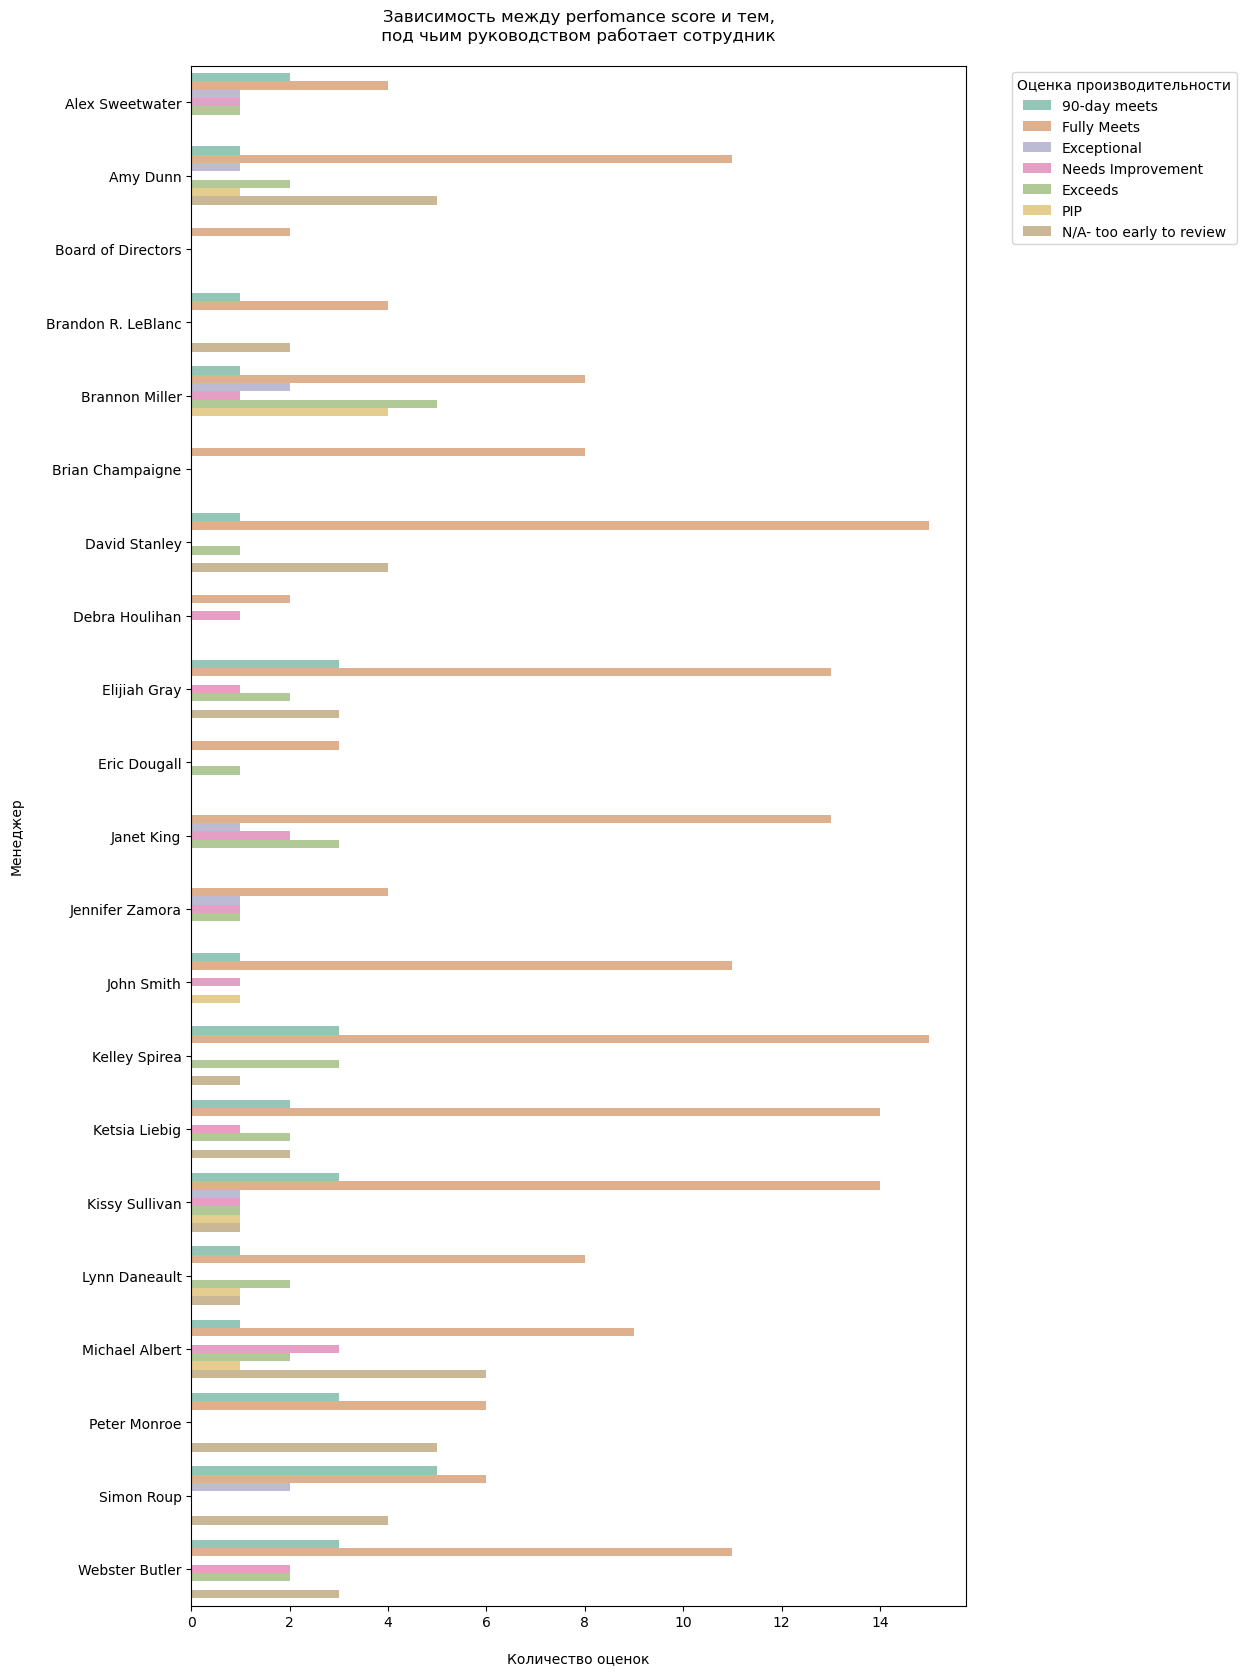

In [117]:
# Построим график для каждого менеджера 

fig, ax = plt.subplots(figsize = (10,20))

sns.barplot(data=df_managers, y='Manager Name', x='count', hue='Performance Score',
            ax=ax, palette='Dark2', alpha=0.5)
ax.set_xlabel('\nКоличество оценок')
ax.set_ylabel('Менеджер\n')
ax.set_title('Зависимость между perfomance score и тем,\n под чьим руководством работает сотрудник \n')
ax.legend(title='Оценка производительности', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

На графике видим, что самый высокий показатель "провалившихся" сотрудников у менеджера Brannon Miller. А самый высокий показатель сотрудников, которым требуется улучшить свои рабочие навыки, у менеджера Michel Albert.
Самый же высокие показатели у положительной оценки "полностью удовлетворяет" у менеджеров Kelley Spirea и David Stanley. А больше всего работников с оценкой "Превосходно" у Brannon Miller.

#### Зависимость между продолжительностью работы в компании и семейным положением сотрудника.

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/4292230149.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_marital = pd.read_sql_query('''SELECT maritaldesc,


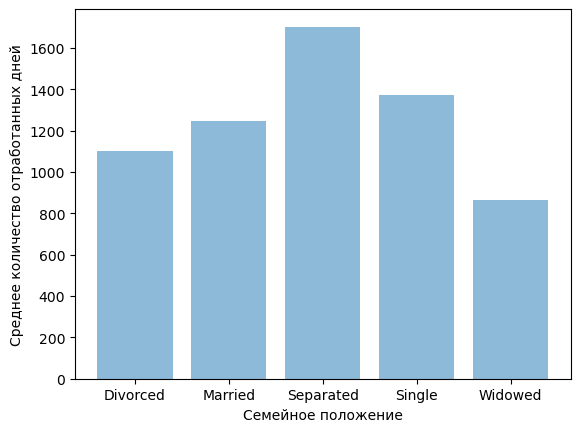

In [131]:
# Подключимся к БД и создадим курсор

conn = ps.connect(**pg_conn)

# Создадим курсор

cur = conn.cursor()

#Выгрузим данные в датасет

df_marital = pd.read_sql_query('''SELECT maritaldesc,
                                  AVG("Days Employed")
                                  FROM hr_dataset 
                                  GROUP BY maritaldesc  
                                  ORDER BY maritaldesc ''', conn)

# Построим график

fig, ax = plt.subplots()
ax.bar(df_marital['maritaldesc'], df_marital['avg'], alpha=0.5)

ax.set_ylabel('Среднее количество отработанных дней')
ax.set_xlabel('Семейное положение')
plt.show()

Как видно из графика самый низкий показатель продолжительности работы в компании у вдов/вдовцов. Около 800 дней. А самый продолжительный срок работы у работников, обозначивших себя как "Seperated". Между женатыми и одинокими людьми значимой разницы не наблюдается.

#### Зависимость между продолжительностью работы в компании и возрастом сотрудника

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/216890416.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_marital = pd.read_sql_query('''SELECT age,


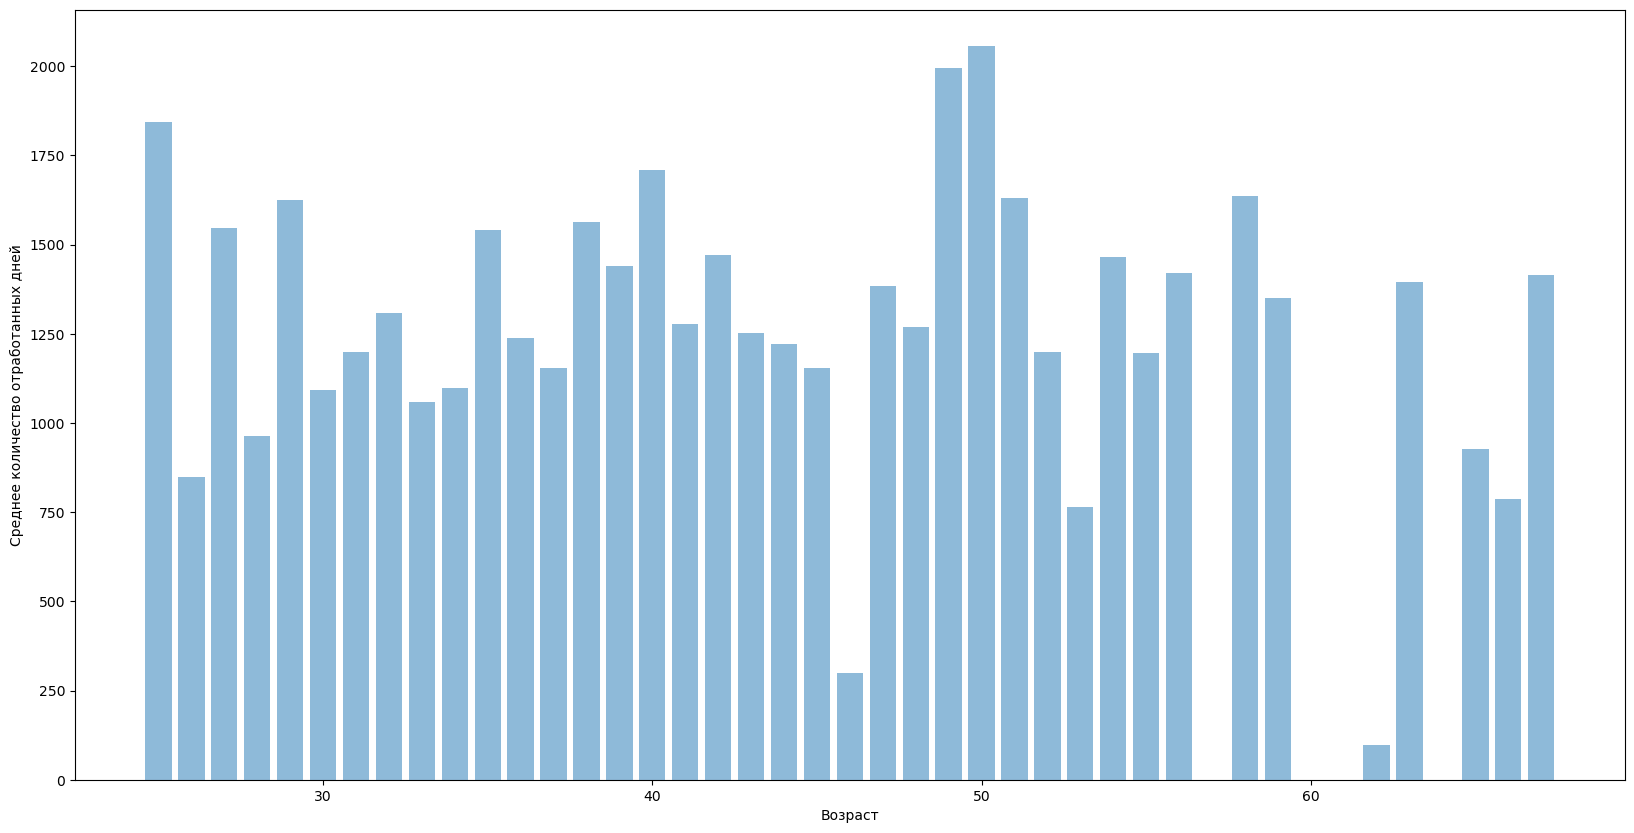

In [134]:
# Подключимся к БД и создадим курсор

conn = ps.connect(**pg_conn)

# Создадим курсор

cur = conn.cursor()

#Выгрузим данные в датасет

df_age = pd.read_sql_query('''SELECT age,
                                  AVG("Days Employed")
                                  FROM hr_dataset 
                                  GROUP BY age  
                                  ORDER BY age ''', conn)

# Построим график

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_age['age'], df_age['avg'], alpha=0.5)

ax.set_ylabel('Среднее количество отработанных дней')
ax.set_xlabel('Возраст')
plt.show()

Явной зависимости между возрастом и продолжительностью работы не наблюдается. Заметны пики в районе 25 лет и 49-50 лет. Разделим сотрудников на возрастные группы и посмотрим, есть ли разница между ними.

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/2559043700.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_group_age = pd.read_sql_query('''


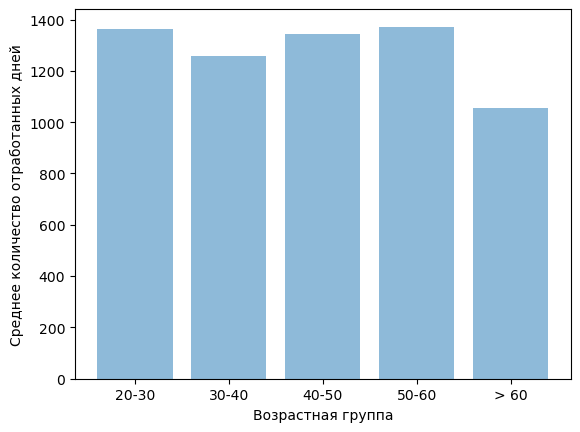

In [135]:
# Подключимся к БД и создадим курсор

conn = ps.connect(**pg_conn)

# Создадим курсор

cur = conn.cursor()

#Выгрузим данные в датасет

df_group_age = pd.read_sql_query('''
            
            (SELECT '20-30' AS group_age,
            AVG("Days Employed")
            FROM hr_dataset
            WHERE age < 30
            GROUP BY group_age)
            
            UNION
            
            (SELECT '30-40' AS group_age,
            AVG("Days Employed")
            FROM hr_dataset
            WHERE age >= 30 AND age < 40
            GROUP BY group_age)
            
            UNION
            
            (SELECT '40-50' AS group_age,
            AVG("Days Employed")
            FROM hr_dataset
            WHERE age >= 40 AND age < 50
            GROUP BY group_age)
            
            UNION
            
            (SELECT '50-60' AS group_age,
            AVG("Days Employed")
            FROM hr_dataset
            WHERE age >= 50 AND age < 60
            GROUP BY group_age)
            
            UNION
            
            (SELECT '> 60' AS group_age,
            AVG("Days Employed")
            FROM hr_dataset
            WHERE age >= 60
            GROUP BY group_age)
            
            ORDER BY group_age
            
            ''', conn)

# Построим график

fig, ax = plt.subplots()
ax.bar(df_group_age['group_age'], df_group_age['avg'], alpha=0.5)

ax.set_ylabel('Среднее количество отработанных дней')
ax.set_xlabel('Возрастная группа')
plt.show()

Разделив работников на возрастные групппы, нам не удалось найти значимую разницу между ними. Отбросим гипотезу. Возраст не влияет на продолжительность работы в компании.

### Оценим эффективность ресурсов привлечения работников

Посчитаем, какое количество работников удалось привлечь с каждого ресурса.

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/2132063712.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_source = pd.read_sql_query('''SELECT "Employee Source",


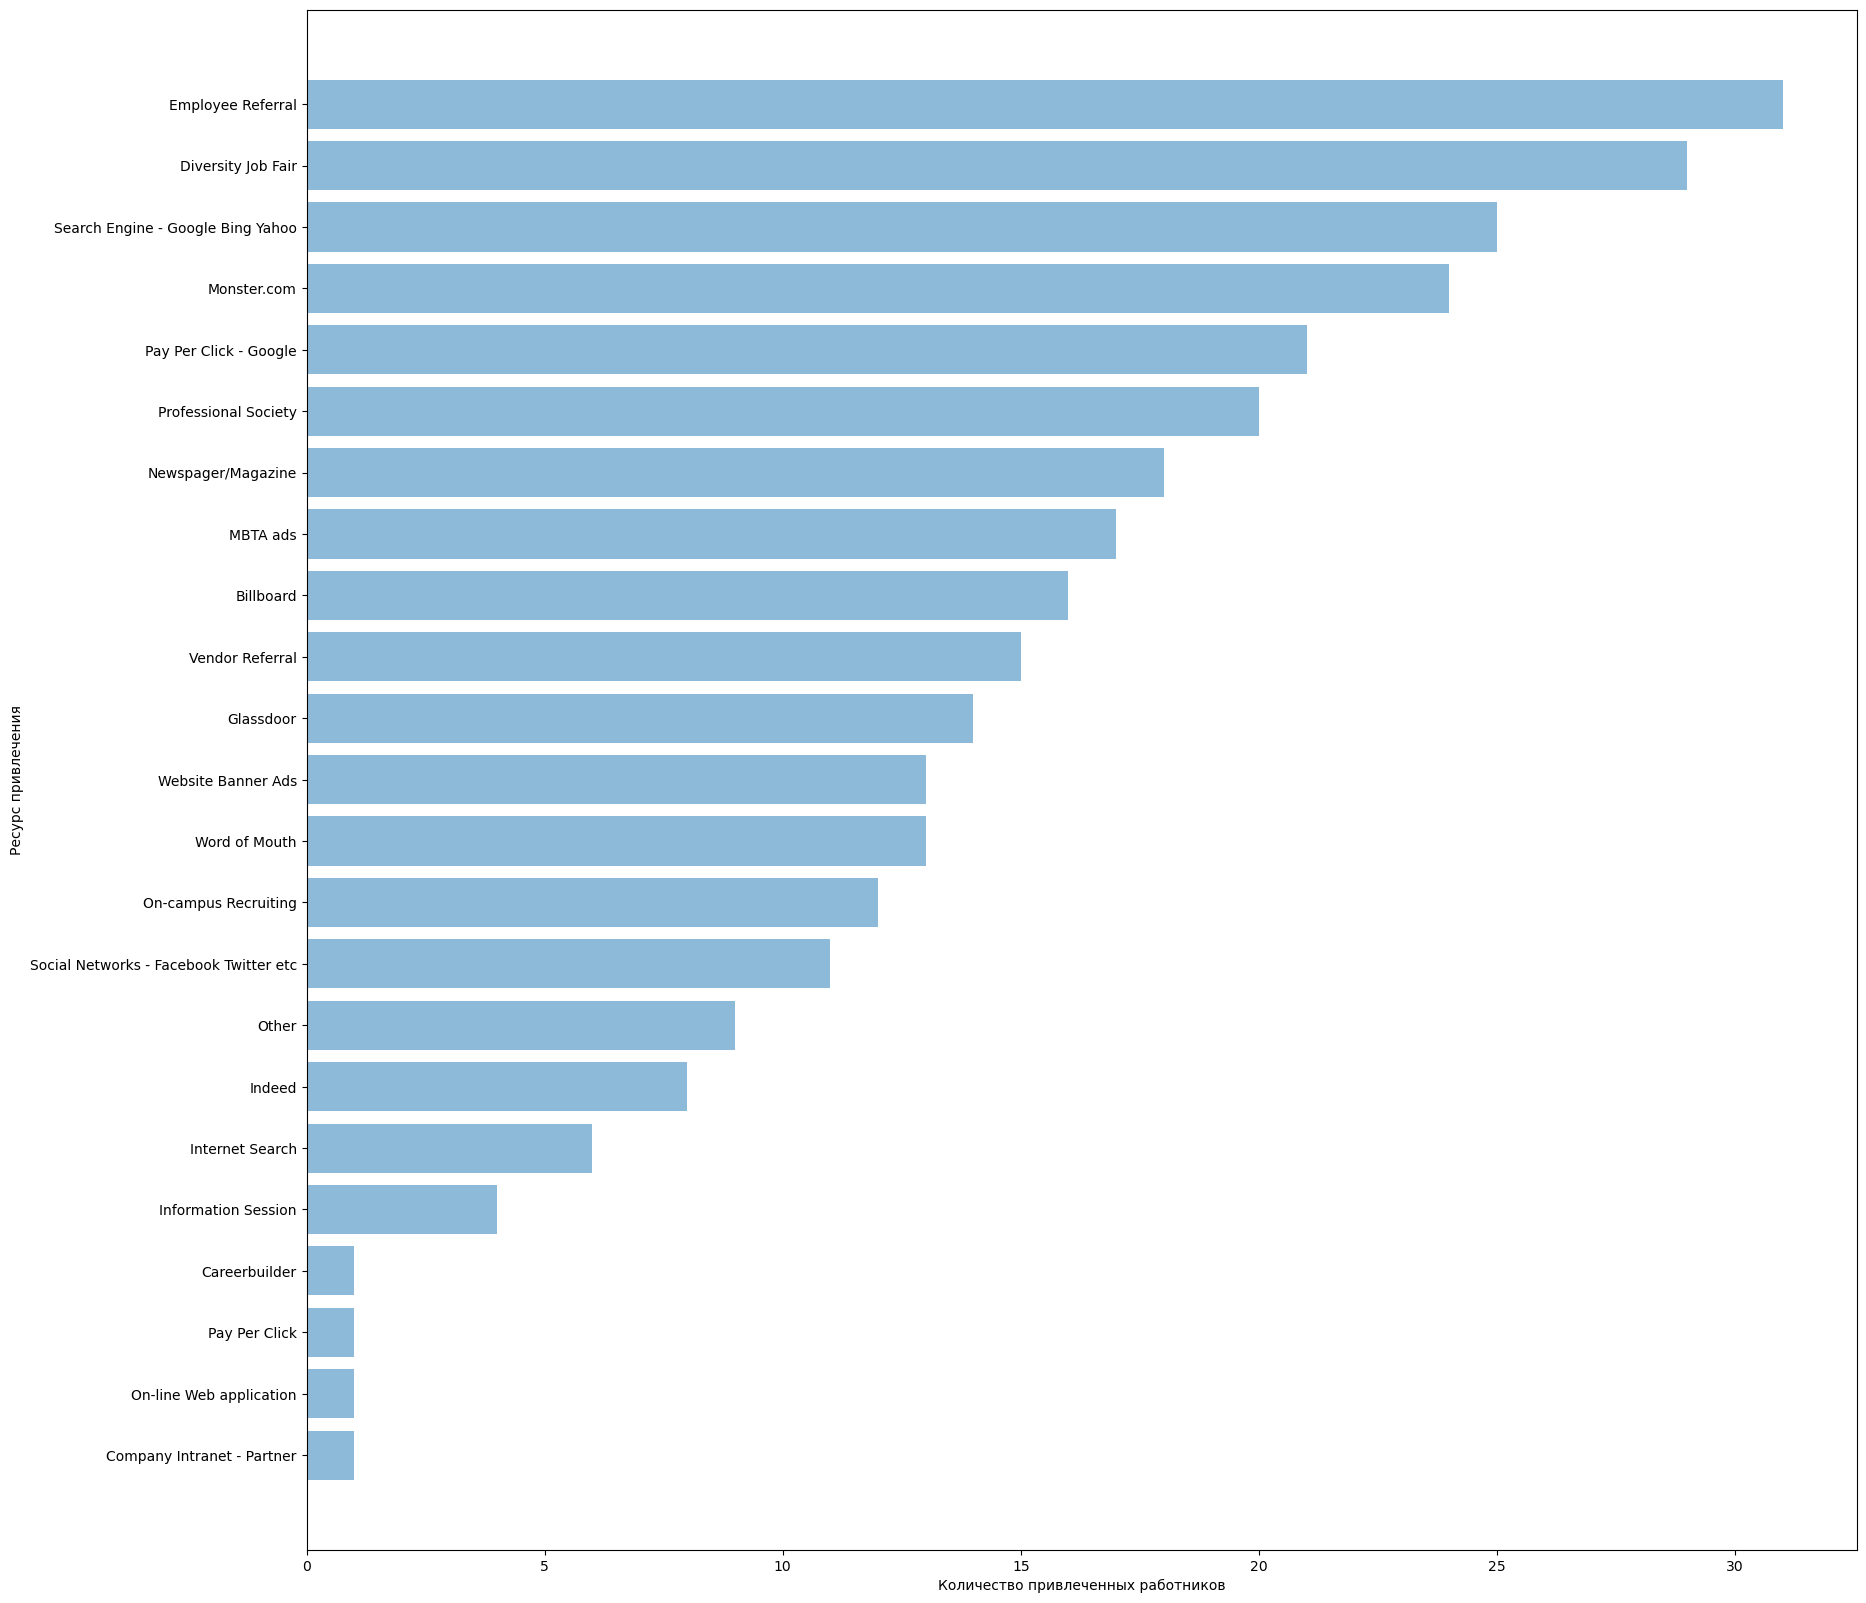

In [144]:
# Подключимся к БД и создадим курсор

conn = ps.connect(**pg_conn)

# Создадим курсор

cur = conn.cursor()

# Посчитаем, сколько работников привлечены с каждого ресурса

df_source = pd.read_sql_query('''SELECT "Employee Source",
                                  COUNT("Employee Number")
                                  FROM hr_dataset 
                                  GROUP BY "Employee Source" 
                                  ORDER BY count ''', conn)

# Построим график

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(df_source['Employee Source'], df_source['count'], alpha=0.5)

ax.set_ylabel('Ресурс привлечения')
ax.set_xlabel('Количество привлеченных работников')
plt.show()

Построим график общих затрат на каждый ресурс

/var/folders/y3/91ppc9495l3g8j_hv2ywk0hr0000gn/T/ipykernel_14627/4129718346.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_source_cost = pd.read_sql_query('''SELECT * FROM recruiting_costs''', conn)


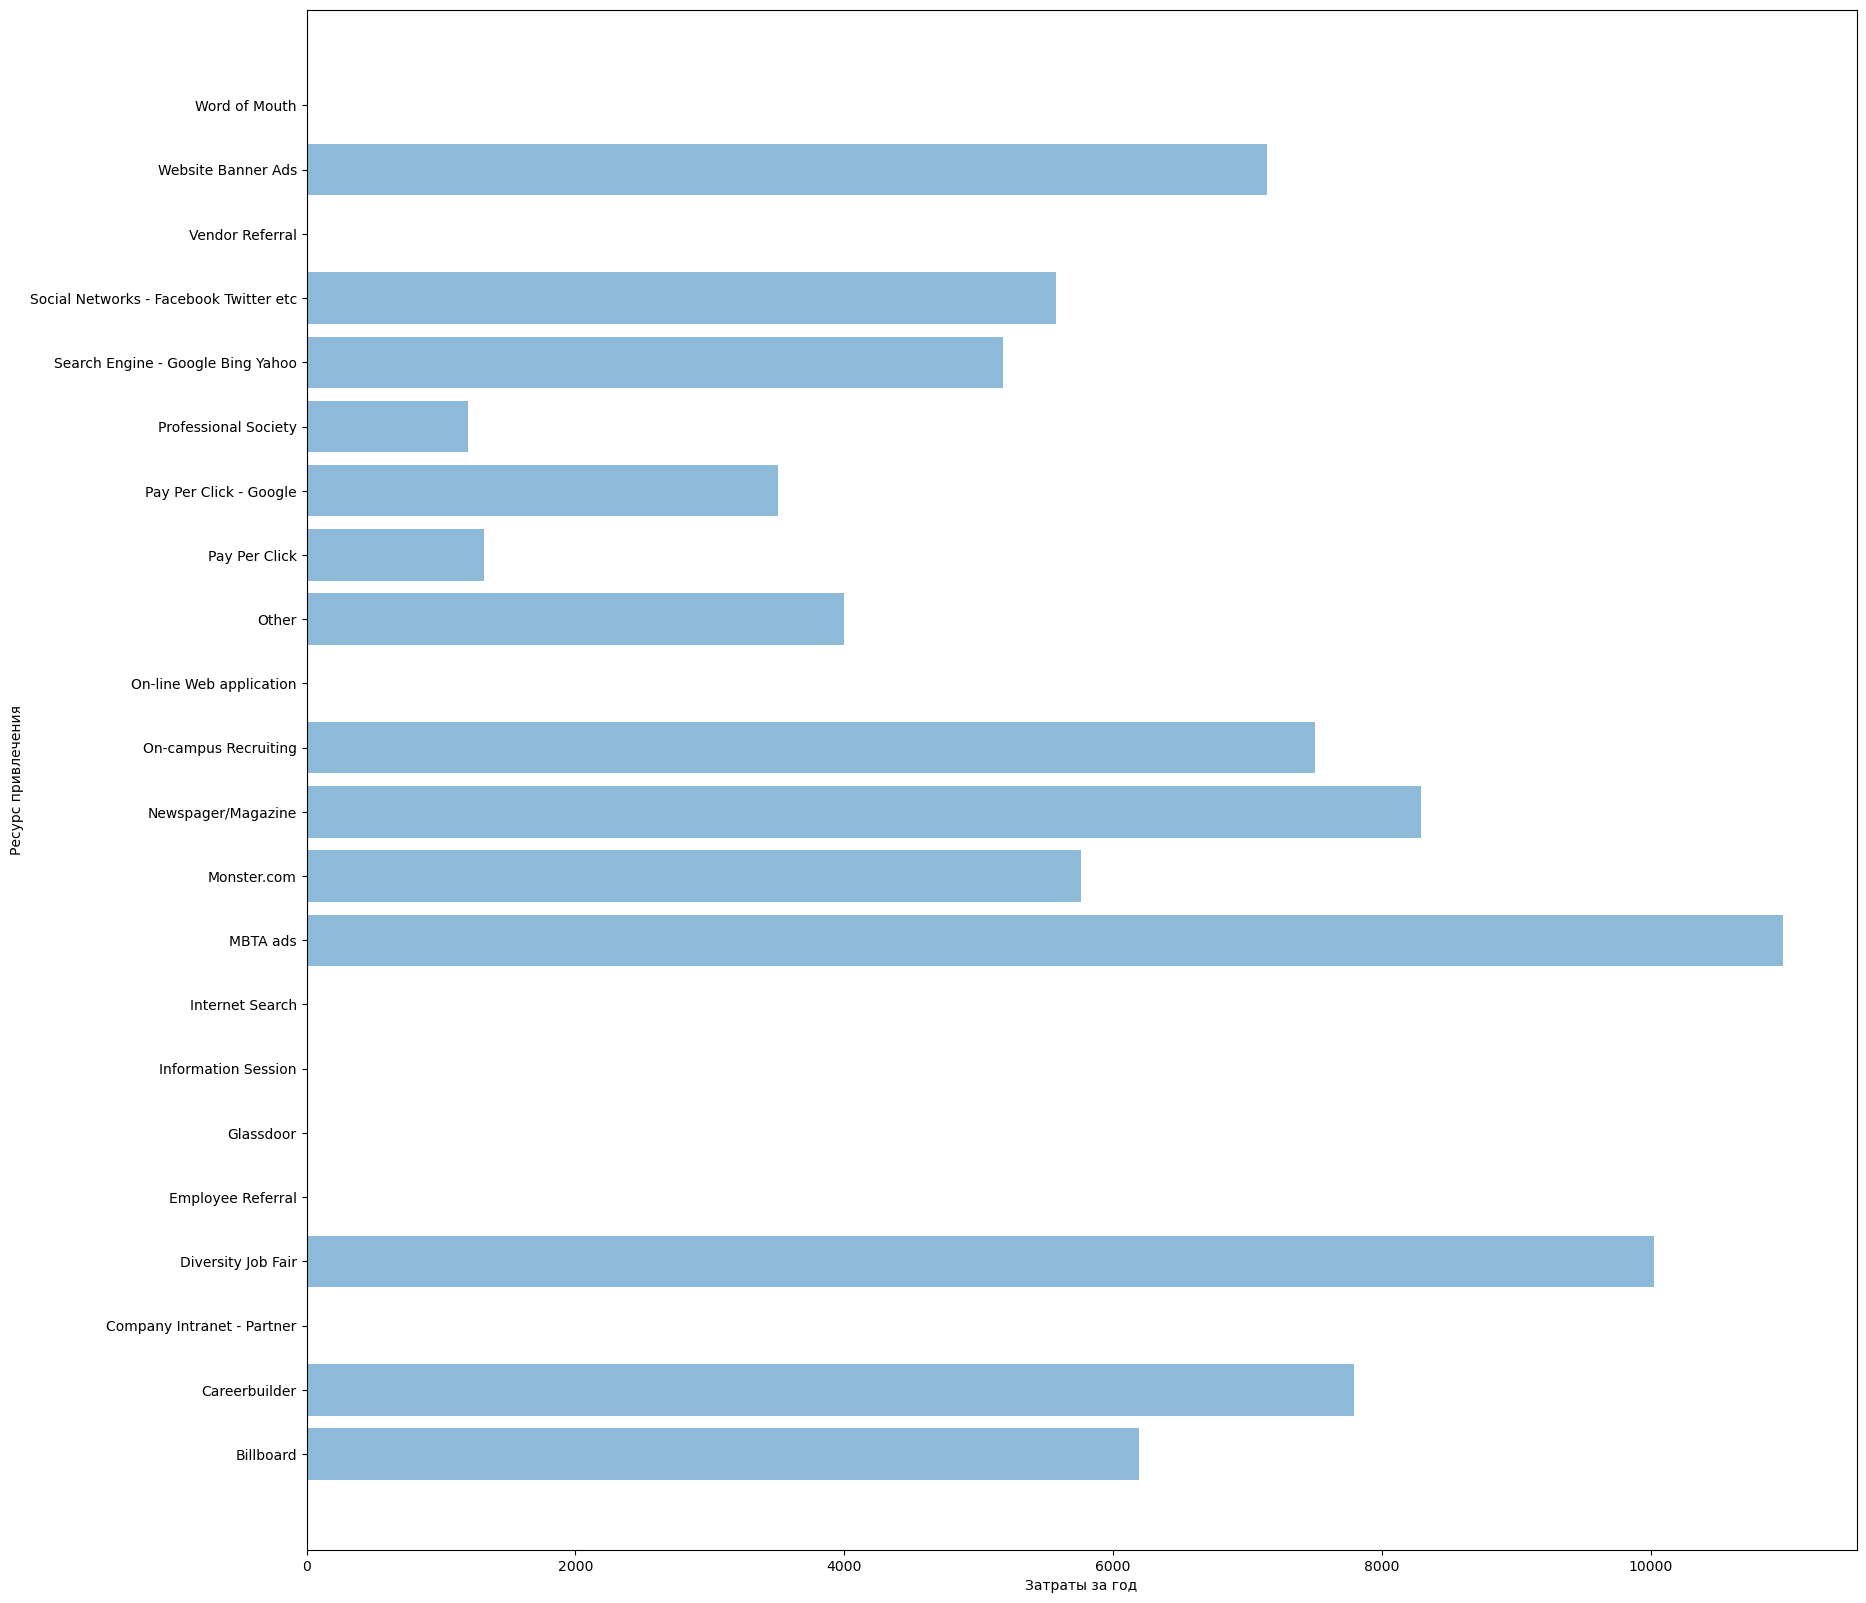

In [152]:
# Подключимся к БД и создадим курсор

conn = ps.connect(**pg_conn)

# Создадим курсор

cur = conn.cursor()

# Посчитаем, сколько работников привлечены с каждого ресурса

df_source_cost = pd.read_sql_query('''SELECT * FROM recruiting_costs''', conn)

# Построим график

fig, ax = plt.subplots(figsize=(20,20))
ax.barh(df_source_cost['Employment Source'], df_source_cost['Total'], alpha=0.5)

ax.set_ylabel('Ресурс привлечения')
ax.set_xlabel('Затраты за год')
plt.show()


Больше всего работников привлечено с помощью реферальной программы привлечения для сотрудников компании. На втором месте такой ресурс как Deversity Job Fair, на третьем продвижение в поиске Google, Yahoo и Bing. А вот затраты компании на ресурсы не соответствуют эффективности ресурсов. Больше всего потрачено на ресурс MBTA ads, Deversity Job Fair и обявления в магазинах и журналах. Стоит пересмотреть распределение затрат между ресурсами. 

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br>
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br>

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


